#### Importing needed Packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating our Perceptron class

In [12]:
class Perceptron(object):
   
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update

                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Prediction

#### Let's apply our Perceptron Algorithm on Iris dataset: we will only grab the first 100 data points and try to predict whether a <font color='red'>setosa</font> or <font color='red'>versicolor</font>

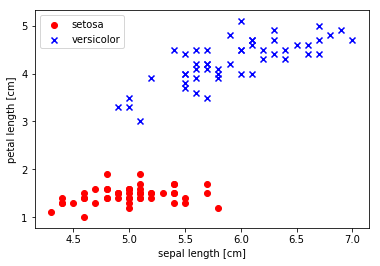

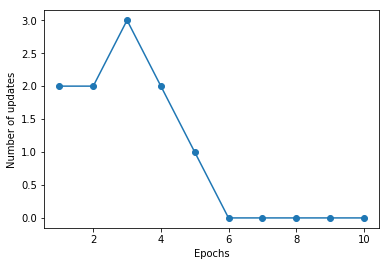

The number of errors by epoch [2, 2, 3, 2, 1, 0, 0, 0, 0, 0]
The list of weights [-0.4  -0.68  1.82]
Testing the predictor: sepal length 5.1 and petal length 1.6 --> the flower in this case is probably Iris-setosa


In [11]:
df = pd.read_csv('iris.data' , header=None)
df.tail()
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

ppn = Perceptron(eta=0.1, n_iter=10)

#Training data
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#Display misclassification errors over n_iter
print('The number of errors by epoch', ppn.errors_)
#Display the weights
print('The list of weights', ppn.w_ )
z = [5.1, 1.6]
print("Testing the predictor: sepal length 5.1 and petal length 1.6 --> the flower in this case is probably"+ " " + 'Iris-setosa' if (ppn.predict(z) == -1) else 'Iris-versicolor')